In [13]:
# Import library pandas untuk manipulasi data, numpy untuk komputasi numerik,
# matplotlib untuk visualisasi data, dan seaborn untuk visualisasi yang lebih estetis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk K-Means Clustering
from sklearn.cluster import KMeans

# Membaca dataset iris.csv ke dalam DataFrame pandas
iris = pd.read_csv("iris.csv")

# Menampilkan ringkasan informasi dataset, termasuk jumlah baris, kolom, tipe data, dan nilai non-null
iris.info()

# Menampilkan 10 baris pertama dari dataset untuk mendapatkan gambaran awal tentang data
iris[0:10]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [14]:
# Membuat distribusi frekuensi untuk kolom 'variety' (spesies) pada dataset iris.
iris_variety = pd.crosstab(index=iris["variety"], 
                           columns="count")

# Menampilkan hasil distribusi frekuensi
iris_variety

col_0,count
variety,
Setosa,50
Versicolor,50
Virginica,50


c:\Users\ACER\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


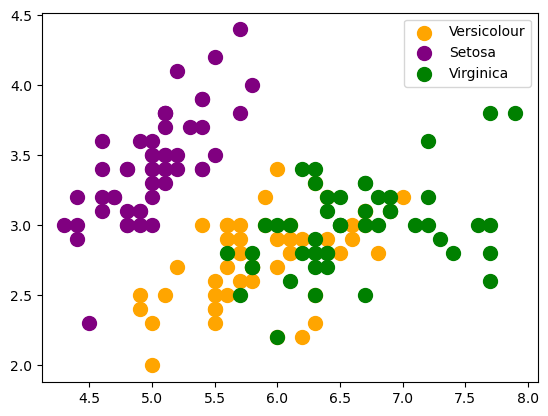

In [15]:
# Menghapus kolom 'variety' dari dataset karena merupakan data kategori (label)
df_numeric = iris.drop('variety', axis=1)

# Import library untuk encoding dan imputasi
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Membuat objek OneHotEncoder untuk mengubah data kategori menjadi numerik
encoder = OneHotEncoder()

# Memilih kolom kategori 'variety' untuk di-encode
categorical_data = iris[['variety']]

# Mengubah data kategori menjadi array numerik dengan one-hot encoding
encoded_categorical = encoder.fit_transform(categorical_data).toarray()

# Membuat DataFrame dari hasil encoding, dengan nama kolom sesuai kategori aslinya
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['variety']))

# Menggabungkan data numerik dengan data kategori yang telah diencode
final_df = pd.concat([df_numeric, encoded_df], axis=1)

# Membuat objek SimpleImputer untuk menangani missing value dengan mengganti menggunakan rata-rata
imputer = SimpleImputer(strategy='mean')

# Mengimputasi nilai yang hilang pada dataset gabungan dan membuat DataFrame baru
final_df_imputed = pd.DataFrame(imputer.fit_transform(final_df), columns=final_df.columns)

# Import library untuk K-Means Clustering
from sklearn.cluster import KMeans

# Membuat model K-Means dengan 3 cluster (karena dataset Iris memiliki 3 spesies)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Melatih model dan mendapatkan label cluster untuk setiap data
y_means = kmeans.fit_predict(final_df_imputed)

# Import library untuk visualisasi
import matplotlib.pyplot as plt

# Memvisualisasikan cluster pertama dengan warna ungu
plt.scatter(final_df_imputed.iloc[y_means==0, 0], final_df_imputed.iloc[y_means==0, 1], s=100, c='orange', label='Versicolour')

# Memvisualisasikan cluster kedua dengan warna oranye
plt.scatter(final_df_imputed.iloc[y_means==1, 0], final_df_imputed.iloc[y_means==1, 1], s=100, c='purple', label='Setosa')

# Memvisualisasikan cluster ketiga dengan warna hijau
plt.scatter(final_df_imputed.iloc[y_means==2, 0], final_df_imputed.iloc[y_means==2, 1], s=100, c='green', label='Virginica')

# Menambahkan legenda untuk menjelaskan warna cluster
plt.legend()

# Menampilkan plot scatter
plt.show()


In [16]:
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

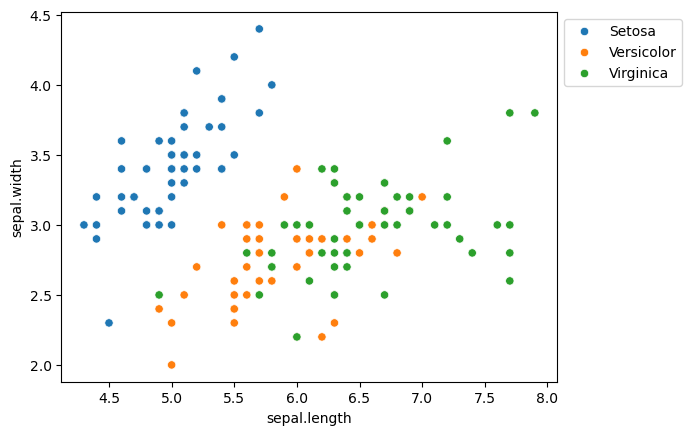

In [17]:
sns.scatterplot(x='sepal.length', y='sepal.width',
                hue='variety', data=iris)

plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()

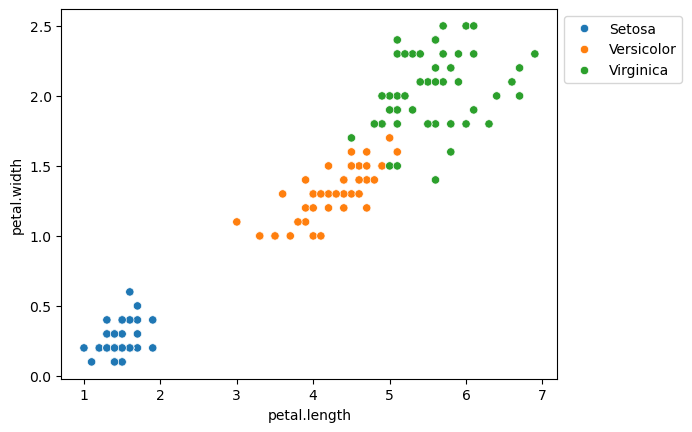

In [18]:
sns.scatterplot(x='petal.length', y='petal.width',
                hue='variety', data=iris)

plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()

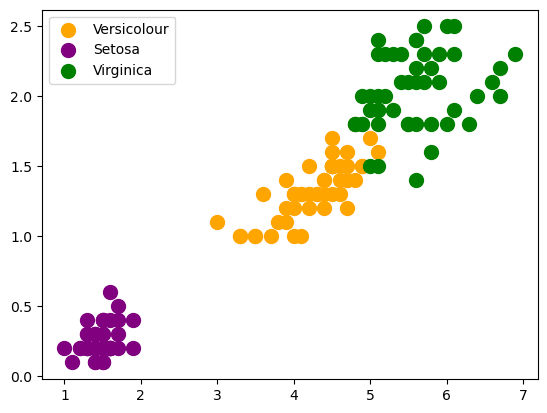

In [19]:
# Memvisualisasikan cluster pertama dengan warna ungu
plt.scatter(final_df_imputed.iloc[y_means==0, 2], final_df_imputed.iloc[y_means==0, 3], s=100, c='orange', label='Versicolour')

# Memvisualisasikan cluster kedua dengan warna oranye
plt.scatter(final_df_imputed.iloc[y_means==1, 2], final_df_imputed.iloc[y_means==1, 3], s=100, c='purple', label='Setosa')

# Memvisualisasikan cluster ketiga dengan warna hijau
plt.scatter(final_df_imputed.iloc[y_means==2, 2], final_df_imputed.iloc[y_means==2, 3], s=100, c='green', label='Virginica')

# Menambahkan legenda untuk menjelaskan warna cluster
plt.legend()

# Menampilkan plot scatter
plt.show()